In [2]:
import os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt 
import PIL

# Model-Related
import tensorflow as tf
from tensorflow.keras import layers
import pydot, graphviz

# Data Preprocessing
from sklearn.model_selection import train_test_split

### Emotion Recognition in Visual Data

This module Extracts / Preprocesses & Explores data from the following datasets:
- CK+  
- Microsoft FER+

It will have a Convolutional Neural Network implemented with Keras + TensorFlow back-end and trained on this data.

We will be creating testing sets of the three team members capturing themselves.


### CK+ Dataset

In [3]:
def getCK():
    ck_data = h5py.File('../Datasets/CK_data.h5', 'r')
    
    X = np.array(ck_data.get('data_pixel'))
    y = np.array(ck_data.get('data_label'))
    
    return X, y

def splitTrainValidate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)
    
    return X_train, y_train, X_test, y_test



### Image Classification with Convolutional Neural Network

- Using Keras with Tensorflow Back-end to Design, Train, Tune & Test a CNN

In [4]:
# Get CK+ Dataset
X_CK, y_CK = getCK()

In [5]:
X_train, y_train, X_test, y_test = splitTrainValidate(X_CK, y_CK)

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

Training Data:  (882, 48, 48)
Training Labels (882,)
Validation Data:  (99, 48, 48)
Validation Labels:  (99,)


In [6]:
# Prepare inputs.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = np.float32(X_train) / X_train.max()
y_train = tf.keras.utils.to_categorical(y_train)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = np.float32(X_test) / X_test.max()
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:

model_ck = tf.keras.models.Sequential([

        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    
        tf.keras.layers.Conv2D(64, kernel_size = (5, 5), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (2, 2), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
        
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (2, 2), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(128, kernel_size = (1, 1), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    
        tf.keras.layers.Conv2D(256, kernel_size = (3, 3), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    
        tf.keras.layers.Conv2D(512, kernel_size = (3, 3), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512, kernel_size = (1, 1), padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2048, activation = 'relu'),
        tf.keras.layers.Dense(2048, activation = 'relu'),
        tf.keras.layers.Dense(512, activation = 'relu'),
    
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model_ck.compile(optimizer = tf.optimizers.RMSprop(0.001), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.CategoricalAccuracy()])
model_ck_hist = model_ck.fit(X_train, y_train, batch_size = 64, epochs = 50)

Epoch 1/50
14/14 [==============================] - 10s 711ms/step - loss: 19.6556 - categorical_accuracy: 0.2041
Epoch 2/50
14/14 [==============================] - 11s 757ms/step - loss: 1.8266 - categorical_accuracy: 0.3084
Epoch 3/50
14/14 [==============================] - 13s 908ms/step - loss: 1.6847 - categorical_accuracy: 0.3379
Epoch 4/50
14/14 [==============================] - 13s 963ms/step - loss: 1.6180 - categorical_accuracy: 0.3900
Epoch 5/50
14/14 [==============================] - 13s 962ms/step - loss: 1.2513 - categorical_accuracy: 0.4932
Epoch 6/50
14/14 [==============================] - 14s 965ms/step - loss: 1.2573 - categorical_accuracy: 0.5385
Epoch 7/50
14/14 [==============================] - 11s 773ms/step - loss: 1.1354 - categorical_accuracy: 0.5680
Epoch 8/50
14/14 [==============================] - 11s 780ms/step - loss: 0.9765 - categorical_accuracy: 0.5952
Epoch 9/50
14/14 [==============================] - 13s 936ms/step - loss: 0.8871 - categorical

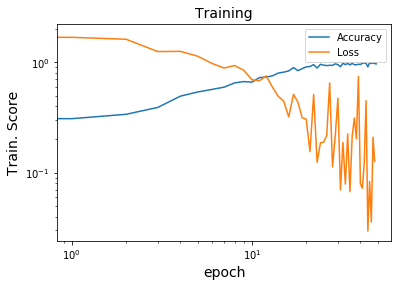

In [11]:
plt.figure(figsize = (6, 4))

# plt.subplot(1, 1, 1)
plt.loglog(model_ck_hist.history['categorical_accuracy'])
plt.loglog(model_ck_hist.history['loss'][1:]);
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('epoch', size = 14)
plt.ylabel('Train. Score', size = 14)
plt.title('Training', size = 14)
plt.show()


In [12]:
model_ck.evaluate(X_test, y_test)

4/4 [==============================] - 0s 42ms/step - loss: 1.4582 - categorical_accuracy: 0.7778


[1.4581958055496216, 0.7777777910232544]

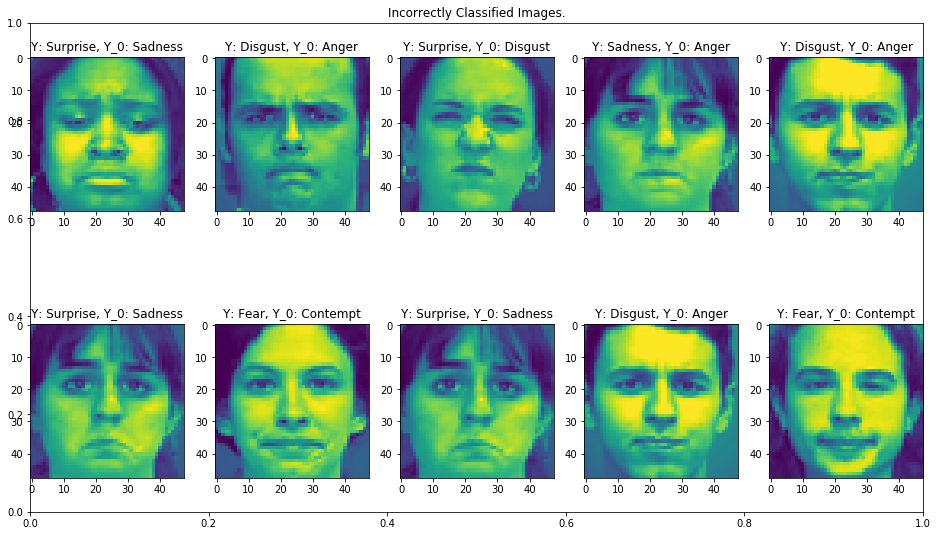

In [15]:
pred = model_ck.predict_classes(X_test)

emotion_labels = ['Anger','Disgust','Fear','Happy','Sadness','Surprise', 'Contempt']

figure = plt.figure(figsize = (16, 9))

i = 0
imgcount = 1
plt.title('Incorrectly Classified Images.')

while imgcount < 11:
    
    if(y_test[i].argmax() != pred[i]):
        figure.add_subplot(2, 5, imgcount)
        plt.imshow(X_test[i].reshape((48, 48)))
        imgcount += 1
        plt.title('Y: '+ emotion_labels[pred[i]] +  ', Y_0: ' + emotion_labels[y_test[i].argmax()])
        
    i += 1
    
plt.show()

In [16]:
model_ck.save("ck_model.h5")


### FER+ Dataset

In [19]:
from io import StringIO

def parsePixels(pixelString):
    data = pixelString.split(" ")
        
    return data


def loadFER():
    fer_data = getFER()
    
# Saves The data in PNG format Locally.

#     fer_training = fer_data[fer_data['Usage'] == 'Training']    
#     fer_validation_private = fer_data[fer_data['Usage'] == 'PrivateTest']
#     fer_validation_public = fer_data[fer_data['Usage'] == 'PublicTest']
    
#     # Save Training Images Locally
#     for idx, each in enumerate(fer_training['pixels']):
#         fer_training['pixels'].values[idx] =  np.asarray(fer_training['pixels'][idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_training['pixels'][idx])
#         img.save('../Datasets/FER2013/FER_TRAIN/' + 'fer_train_' + str(idx) + '.png')
        
#     # Save Training Labels
#     fer_training_y = fer_training['emotion']

#     # Save Validation Images (Private)
#     for idx, each in enumerate(fer_validation_private['pixels']):
#         fer_validation_private['pixels'].iloc[idx] = np.asarray(fer_validation_private['pixels'].iloc[idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_validation_private['pixels'].iloc[idx])
#         img.save('../Datasets/FER2013/FER_VAL_PRIVATE/' + 'fer_val_private_' + str(idx) + '.png')
        
#     # Save Validation Labels (Private)    
#     fer_validation_private_y = fer_validation_private['emotion']    
        
#     # Save Validation Images (Public)
#     for idx, each in enumerate(fer_validation_public['pixels']):
#         fer_validation_public['pixels'].iloc[idx] = np.asarray(fer_validation_public['pixels'].iloc[idx]).reshape(48, 48)
#         img = PIL.Image.fromarray(fer_validation_public['pixels'].iloc[idx])
#         img.save('../Datasets/FER2013/FER_VAL_PUBLIC/' + 'fer_val_public' + str(idx) + '.png')
        
#     # Save Validation Labels (Public)    
#     fer_validation_public_y = fer_validation_public['emotion']    
    
    # Prepare data
    pixels = fer_data['pixels'].tolist()
    parsed_pixels = []
    
    for pix_sequence in pixels:
        picture = parsePixels(pix_sequence)
        picture = np.asarray(picture, dtype = np.uint8).reshape(48, 48)
        parsed_pixels.append(picture)

    parsed_pixels = np.asarray(parsed_pixels)
    parsed_pixels = np.expand_dims(parsed_pixels, -1)
    
    emotion_labels = np.matrix(fer_data['emotion'])
    emotion_labels = emotion_labels.reshape(emotion_labels.shape[1], 1)
    
    return parsed_pixels, emotion_labels


def getFER():
    fer_data = pd.read_csv('../Datasets/fer2013.csv')
    
    return fer_data
    

In [21]:
# Get FER+ Dataset
fer_pixels, fer_labels = loadFER()

In [41]:
X_train, y_train, X_test, y_test = splitTrainValidate(fer_pixels, fer_labels)

print("Training Data: ", X_train.shape)
print("Training Labels", y_train.shape)
print("Validation Data: ", X_test.shape)
print("Validation Labels: ",y_test.shape)

Training Data:  (32298, 48, 48, 1)
Training Labels (32298, 1)
Validation Data:  (3589, 48, 48, 1)
Validation Labels:  (3589, 1)


In [42]:
# Prepare inputs.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = np.float32(X_train) / X_train.max()
y_train = tf.keras.utils.to_categorical(y_train)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = np.float32(X_test) / X_test.max()
y_test = tf.keras.utils.to_categorical(y_test)

In [43]:
model = tf.keras.models.Sequential([
    
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    
        tf.keras.layers.Conv2D(64, kernel_size = (5, 5), padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), activation = 'relu', padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    
        tf.keras.layers.Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = "same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size = (1, 1), activation = 'relu', padding = "same"),     
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),

        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, kernel_size = (1, 1), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, kernel_size = (1, 1), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, kernel_size = (2, 2), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
    
        tf.keras.layers.Conv2D(512, kernel_size = (2, 2), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, kernel_size = (1, 1), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, kernel_size = (2, 2), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    
        tf.keras.layers.Conv2D(512, kernel_size = (2, 2), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, kernel_size = (1, 1), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, kernel_size = (2, 2), activation = 'relu', padding = "same"),    
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2048, activation = 'relu'),    
        tf.keras.layers.Dense(2048, activation = 'relu'),
        tf.keras.layers.Dense(1024, activation = 'relu'),
    
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer = tf.optimizers.RMSprop(0.0025), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.CategoricalAccuracy()])
model_log = model.fit(X_train, y_train, batch_size = 2^4 * 7, epochs = 50, validation_data = (X_test, y_test))


Epoch 1/50
1077/1077 [==============================] - 637s 592ms/step - loss: 2.1785 - categorical_accuracy: 0.2392 - val_loss: 1.8747 - val_categorical_accuracy: 0.2009
Epoch 2/50
1077/1077 [==============================] - 671s 623ms/step - loss: 1.8243 - categorical_accuracy: 0.2504 - val_loss: 1.8159 - val_categorical_accuracy: 0.2391
Epoch 3/50
1077/1077 [==============================] - 647s 601ms/step - loss: 1.7748 - categorical_accuracy: 0.2709 - val_loss: 1.7504 - val_categorical_accuracy: 0.2750
Epoch 4/50
1077/1077 [==============================] - 639s 594ms/step - loss: 1.7332 - categorical_accuracy: 0.2933 - val_loss: 1.7652 - val_categorical_accuracy: 0.2862
Epoch 5/50
1077/1077 [==============================] - 665s 617ms/step - loss: 1.6544 - categorical_accuracy: 0.3348 - val_loss: 1.6155 - val_categorical_accuracy: 0.3505
Epoch 6/50
1077/1077 [==============================] - 638s 593ms/step - loss: 1.5669 - categorical_accuracy: 0.3775 - val_loss: 1.5121 - v

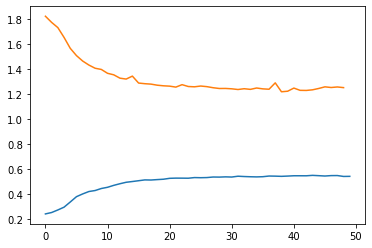

In [45]:
plt.plot(model_log.history['categorical_accuracy'])
plt.plot(model_log.history['loss'][1:]);

In [46]:
model.evaluate(X_test, y_test)

113/113 [==============================] - 10s 87ms/step - loss: 1.2220 - categorical_accuracy: 0.5517


[1.2220202684402466, 0.5516856908798218]

In [53]:
fer_model = model.weights
model.save_weights("fer_model.h5")